# **Linear Regression**

**Problem Statement**

Build a model which predicts CO2 emissions based on the fuel consumption of vehicles in the city.

**Data**

Official Canadian fuel consumption ratings dataset was used, and carbon dioxide amount was predicted based on fuel consumption by cars in the city.​

**Importing Python Libraries**

In [1]:
#Required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Ignores warnings at the output
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**



In [2]:
#CSV file path
data = pd.read_csv("/kaggle/input/co2emissions/CO2 Emissions_Canada.csv")
# Displays the first three rows of the dataset
data.head(3)
# Check for missing values
data.isnull().sum()*100/data.shape[0]
# Drops not applicable rows
data.dropna(axis=0)
# Selects relevant columns
data = data[["Fuel Consumption City (L/100 km)",
             "Fuel Consumption Hwy (L/100 km)",
             "Fuel Consumption Comb (L/100 km)",
             "CO2 Emissions(g/km)"]]
data.head(3)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,9.9,6.7,8.5,196
1,11.2,7.7,9.6,221
2,6.0,5.8,5.9,136


**Visualization**

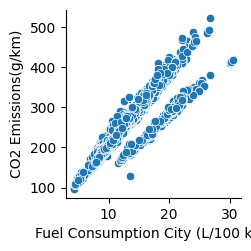

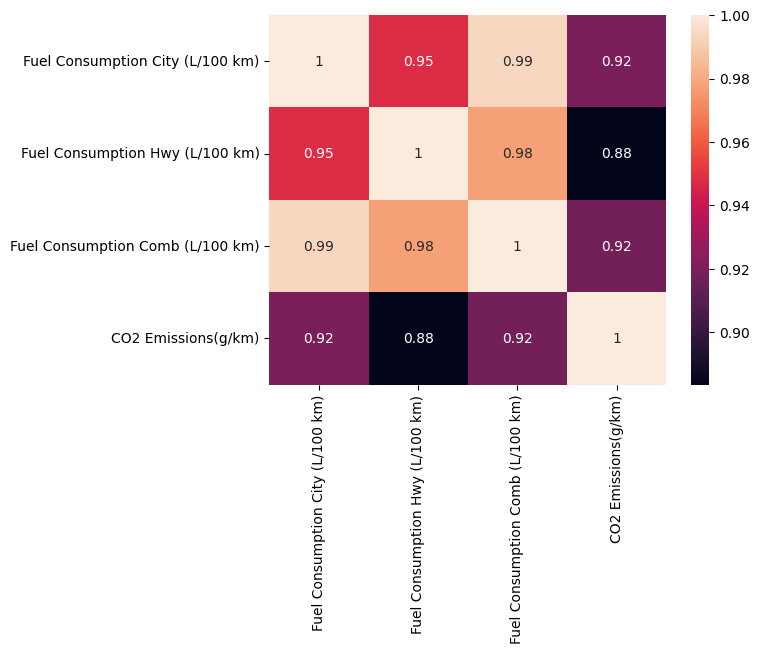

In [3]:
import seaborn as sns #visualization lib
# Visualizes data relationships
sns.pairplot(data,x_vars="Fuel Consumption City (L/100 km)", y_vars="CO2 Emissions(g/km)")
plt.show()
# Creates a correlation heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

**Performing Simple Linear Regression**



Data is split into training and testing sets.

In [4]:
# Splits the data into training and testing sets
x = data["Fuel Consumption City (L/100 km)"]
y = data["CO2 Emissions(g/km)"]

from sklearn.model_selection import train_test_split #library to train our data 
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.7, test_size = 0.3, random_state = 100 ) 
# Displays the shape, datatypes and description of the training and testing sets
print(x_train.shape, x_train.dtypes)
print(x_train.describe())
print(x_test.shape, x_train.dtypes)
print(y_train.shape, x_train.dtypes)
print(y_test.shape, x_train.dtypes)



(5169,) float64
count    5169.000000
mean       12.498181
std         3.475251
min         4.200000
25%        10.100000
50%        12.000000
75%        14.500000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64
(2216,) float64
(5169,) float64
(2216,) float64


In [5]:
import statsmodels.api as sm
# Fits a linear regression model using statsmodels
x_train_sm = sm.add_constant(x_train)
#Fits the data
lr = sm.OLS(y_train, x_train_sm).fit()
#Checks intercept and coefficient value
lr.params

const                               56.665465
Fuel Consumption City (L/100 km)    15.434433
dtype: float64

The intercept value is 56.665, and 15.434 is a slope for the variable Fuel Consumption City (L/100 km).

In [6]:
# Display regression model summary
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.846
Model:                             OLS   Adj. R-squared:                  0.846
Method:                  Least Squares   F-statistic:                 2.838e+04
Date:                 Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                         18:21:46   Log-Likelihood:                -23516.
No. Observations:                 5169   AIC:                         4.704e+04
Df Residuals:                     5167   BIC:                         4.705e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

**Performing predictions on the test set**

In [7]:
# Prepares the testing data for prediction
x_test_sm = sm.add_constant(x_test)

y_pred = lr.predict(x_test_sm)

# Extracts the indices from y_pred.head(10)
indices = y_pred.head(10).index

# Extracts the corresponding rows from x_test
selected_rows_x = x_test.loc[indices]

# Extracts the corresponding predicted emissions
selected_rows_y = y_pred.head(10)

# Combines the rows and emissions into a DataFrame
selected_data = pd.concat([selected_rows_x, selected_rows_y], axis=1)
selected_data.columns = ["Fuel Consumption City (L/100 km)", "Predicted CO2 Emissions (g/km)"]
selected_data = selected_data.rename_axis("Random Rows")
selected_data["Predicted CO2 Emissions (g/km)"] = selected_data["Predicted CO2 Emissions (g/km)"].round(1)

# Print the selected data
print(selected_data)

             Fuel Consumption City (L/100 km)  Predicted CO2 Emissions (g/km)
Random Rows                                                                  
671                                      12.1                           243.4
4757                                     15.7                           299.0
5562                                     10.7                           221.8
185                                      13.6                           266.6
4309                                     12.6                           251.1
6529                                     10.0                           211.0
4487                                     13.5                           265.0
3622                                      7.7                           175.5
7234                                      9.8                           207.9
2982                                     16.7                           314.4


Results


Root Mean Squared Error:  23.22
Mean Squared Error:  539.4
R-squared (R²):  0.8
Mean Absolute Error:  14.4


Intercept  56.7
Coefficiency [15.4]




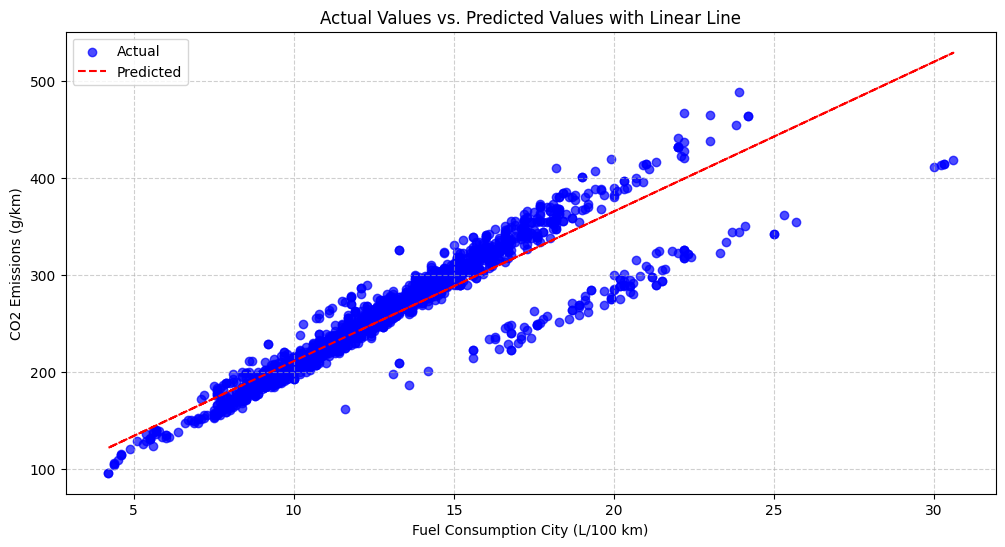

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
# Fits a linear regression model using scikit-learn
x_train_lm = x_train.values.reshape(-1,1)
x_test_lm = x_test.values.reshape(-1,1)

y_train_lm = y_train.values.reshape(-1,1)
y_test_lm = y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train_lm, y_train)

y_pred = model.predict(x_test_lm)

# Calculates and prints metrics

mse = mean_squared_error(y_test, y_pred)
mea = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Results\n\n")
print("Root Mean Squared Error: ", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("Mean Squared Error: ", round(mse,1))
print("R-squared (R²): ", round(r2,1))
print("Mean Absolute Error: ", round(mea,1))
print("\n")
print("Intercept ", round(model.intercept_,1))
print(f"Coefficiency {model.coef_.round(1)}")
print("\n")

# Creates an array of indices corresponding to the data points
indices = np.arange(len(y_pred))

# Creates a scatter plot of actual values (y_test) with respect to fuel consumption
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.7)

# Fits a linear line to the predicted values (y_pred)
slope_pred, intercept_pred = np.polyfit(x_test, y_pred, 1)
linear_line_pred = slope_pred * x_test + intercept_pred

# Plots the linear line for predictions
plt.plot(x_test, linear_line_pred, color='red', linestyle='--', label='Predicted')

plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Actual Values vs. Predicted Values with Linear Line')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Shows the plot
plt.show()